# Quantum Machine Learning: Sine Function Approximation

Task 4 - ***SUBMITTED BY DISHA MONDAL***

This notebook demonstrates the implementation of a Quantum Machine Learning model to learn the sine function on the interval [0, 2π].

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

## Step 1: Define the Quantum Device
We define the quantum device with 3 qubits using PennyLane's default qubit simulator.

In [2]:
dev = qml.device('default.qubit', wires=3)

## Step 2: Define the Variational Circuit
We define the variational quantum circuit. This circuit consists of an angle embedding for input encoding and multiple layers of rotation and CNOT gates for the variational part.
The number of layers is set to 3.

In [3]:
n_layers = 3

@qml.qnode(dev)
def variational_circuit(inputs, weights):
    # Encode the input
    qml.AngleEmbedding(inputs, wires=range(3), rotation='Y')

    # Apply variational layers
    for i in range(n_layers):
        qml.RY(weights[i, 0], wires=0)
        qml.RY(weights[i, 1], wires=1)
        qml.RY(weights[i, 2], wires=2)
        qml.CNOT(wires=[0, 1])
        qml.CNOT(wires=[1, 2])

    # Measure the output
    return qml.expval(qml.PauliZ(0))

## Step 3: Define the Cost Function
The cost function is defined as the mean squared error between the predicted values from the quantum circuit and the true sine values.

In [4]:
def cost(weights, X, Y):
    predictions = [variational_circuit([x], weights) for x in X]
    return np.mean((np.array(predictions) - Y) ** 2)

## Step 4: Generate Training Data
We generate training data by discretizing the interval [0, 2π] into 50 points and computing the sine values at these points.

In [5]:
n_points = 50  # Number of discretization points
X = np.linspace(0, 2 * np.pi, n_points)
Y = np.sin(X)

## Step 5: Initialize Weights
We initialize the weights for the variational circuit randomly within the range [-π, π].

In [6]:
weights = np.random.uniform(low=-np.pi, high=np.pi, size=(n_layers, 3))

## Step 6: Define Optimizer
We use the Adam optimizer provided by PennyLane to optimize the weights of the variational circuit.

In [7]:
opt = qml.AdamOptimizer(stepsize=0.1)

## Step 7: Training Loop
We train the model for 300 steps, updating the weights to minimize the cost function.

In [8]:
steps = 300
for i in range(steps):
    weights, cost_value = opt.step_and_cost(lambda w: cost(w, X, Y), weights)
    if (i + 1) % 20 == 0:
        print(f'Step {i+1}, Cost: {cost_value:.4f}')

print('Training complete.')

Step 20, Cost: 0.0001
Step 40, Cost: 0.0000
Step 60, Cost: 0.0000
Step 80, Cost: 0.0000
Step 100, Cost: 0.0000
Step 120, Cost: 0.0000
Step 140, Cost: 0.0000
Step 160, Cost: 0.0000
Step 180, Cost: 0.0000
Step 200, Cost: 0.0000
Step 220, Cost: 0.0000
Step 240, Cost: 0.0000
Step 260, Cost: 0.0000
Step 280, Cost: 0.0001
Step 300, Cost: 0.0000
Training complete.


## Step 8: Generate Test Data
We generate test data to evaluate the trained model by discretizing the interval [0, 2π] into 100 points.

In [9]:
X_test = np.linspace(0, 2 * np.pi, 100)
Y_test = np.sin(X_test)

## Step 9: Make Predictions
We use the trained model to make predictions on the test data.

In [10]:
predictions = [variational_circuit([x], weights) for x in X_test]

## Step 10: Plot Results
Finally, we plot the true sine values and the predicted values as discrete points to visualize the performance of the model.

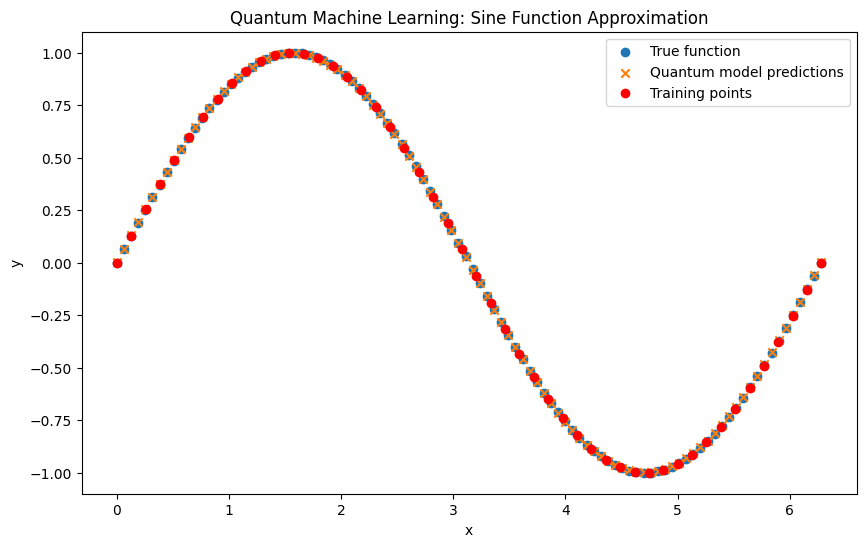

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, label='True function', marker='o')
plt.scatter(X_test, predictions, label='Quantum model predictions', marker='x')
plt.scatter(X, np.sin(X), color='red', label='Training points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Quantum Machine Learning: Sine Function Approximation')
plt.show()